<a href="https://colab.research.google.com/github/CodeBrando/Proyecto_Ds/blob/main/Proyecto_Parte3_Braga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import  numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV






pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/supermarket_sales - Sheet1.csv', sep=';')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
mean_total = df['Total'].mean()
df['Total'].fillna(mean_total, inplace=True)
df.head().round(2)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,261.42,354.17,1/5/2019,13:08,Ewallet,522.83,261.42,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,162.16,354.17,3/3/2019,13:23,Credit card,324.31,162.16,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,302.08,354.17,2/8/2019,10:37,Ewallet,604.17,302.08,5.3


Datos por columnas:

Invoice Id: Número identificador de la factura, generado por computadora.

Branch: Rama de supermercado. Hay 3 ramas disponibles, identificadas como A, B y C.

City: Localización de los supermercados.

Customer Type: Tipo de cliente, diferenciado por 'Member' para clientes con tarjeta de mimebro, y 'Nomral' para clientes sin.

Gender: Género del cliente.

Product line: Grupos de categorización general de ítems. Existen los siguientes: Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.

Unit price: Precio de cada prducto en $.

Quantity: Cantidad de productos comprados por el cliente.

Tax 5%: Impuesto del 5% a la compra del cliente.

Total: Precio total incluyendo el impuesto.

Date: Fecha de la compra, desde enero hasta marzo de 2019.

Time: Hora de la compra, de 10am a 9pm.

Payment: Tipo de pago usado por el cliente, pudiendo ser Cash, Credit card and Ewallet.

cogs: Costo en bruto del producto+ vendido.

gross income: Ingresos brutos.

Rating: Satisfacción del cliente sobre su experiencia de compra, del 1 al 10.



In [20]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,44.633230,354.167120,307.58738,44.633230,6.97270
std,26.494628,2.923431,75.564331,236.633846,234.17651,75.564331,1.71858
min,10.080000,1.000000,0.508500,13.167000,10.17000,0.508500,4.00000
25%,32.875000,3.000000,7.881750,166.178250,118.49750,7.881750,5.50000
50%,55.230000,5.000000,17.334000,354.167120,241.76000,17.334000,7.00000
75%,77.935000,8.000000,36.549750,464.278500,448.90500,36.549750,8.50000
max,99.960000,10.000000,448.785000,1042.650000,993.00000,448.785000,10.00000


Como puede verse gracias al df.info(), el dataset no contiene valores nulos o NaN gracias a que los que existían en la columna 'Total' fueron reemplazados por la media a través del método utilizado en el primer bloque de código (df['Total'].fillna(mean_total, inplace=True)).

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  gross income   1000 non-null   float64
 15  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(9)
memory usage: 125.1+ KB


En primer lugar, quiero investigar si existe alguna relación entre clientes miembros y no miembros con respecto a las compras que han hecho, separados por género.

Como puede verse según estos dos gráficos, si bien no exite una diferencia enorme, las mujeres miembro son las que más compras realizan, seguidas por los hombres miembro.

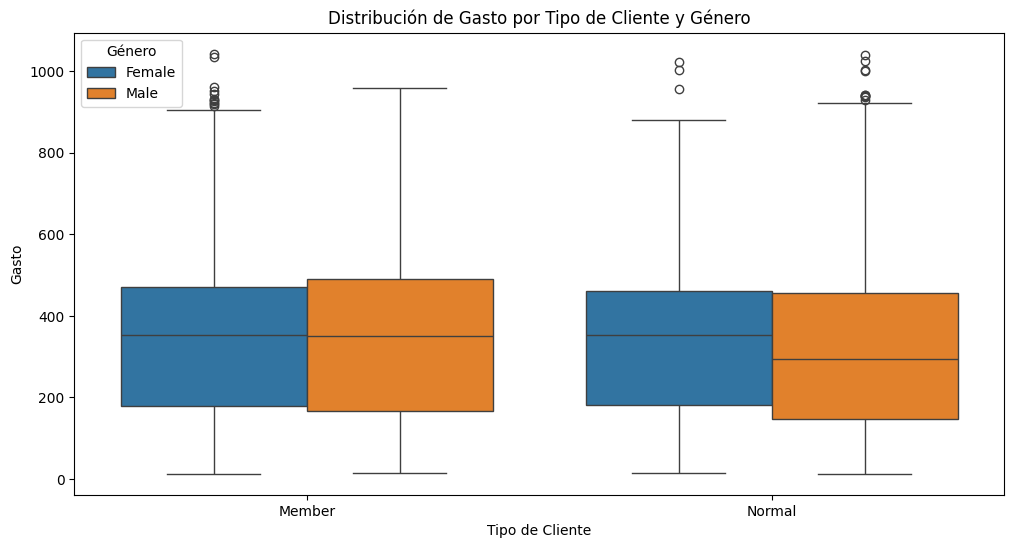

In [22]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Customer type', y='Total', hue='Gender', data=df)
plt.title('Distribución de Gasto por Tipo de Cliente y Género')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Gasto')
plt.legend(title='Género')
plt.show()



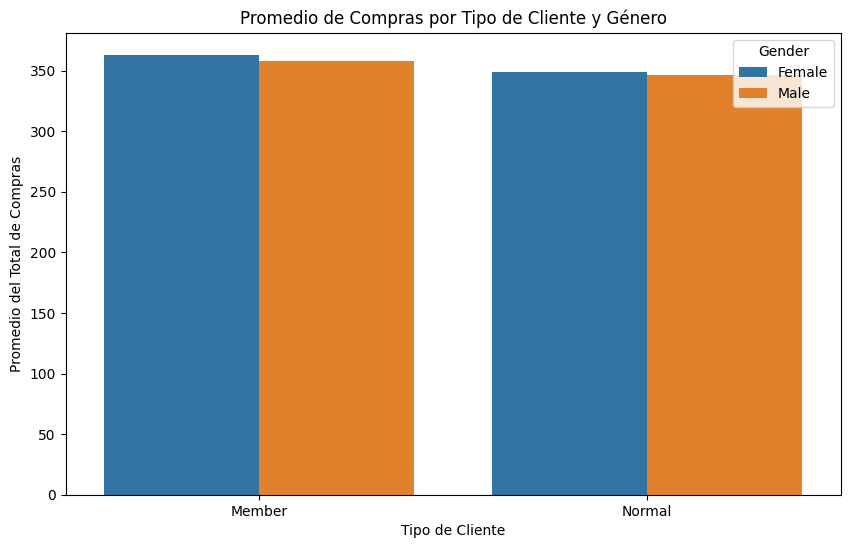

In [23]:


grouped_data = df.groupby(['Customer type', 'Gender'])['Total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Total', hue='Gender', data=grouped_data)
plt.title('Promedio de Compras por Tipo de Cliente y Género')
plt.ylabel('Promedio del Total de Compras')
plt.xlabel('Tipo de Cliente')
plt.show()


Para reforzar este análisis, quiero además saber cuánto gasta cada cliente según si es miembro o no, dado que aunque los miembros compren más, quizás los no mimebros registran compras más caras.

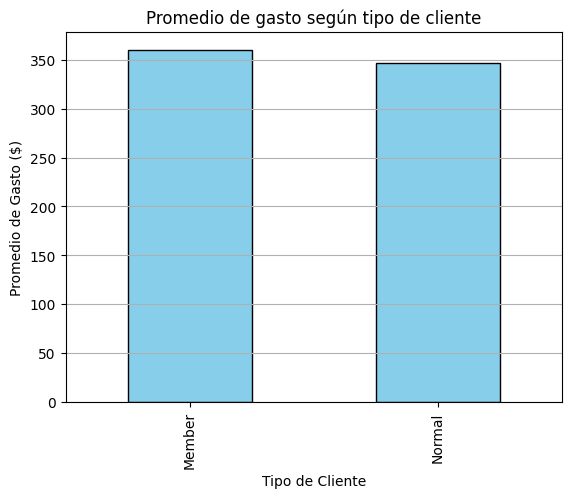

In [24]:
df.groupby('Customer type')['Total'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Promedio de gasto según tipo de cliente')
plt.ylabel('Promedio de Gasto ($)')
plt.xlabel('Tipo de Cliente')
plt.grid(axis='y')
plt.show()


Ahora bien, me gustaría averiguar cuál o cuáles son las horas del día en las que más compras se efectúan. Para esto, utilizaré un gráfico lineal para evaluar la fluctuación del volumen de compras, según la hora del día. Como puede verse en el gráfico de abajo, las 19:00hs parecen ser la hora en la que más compras se efectúan.

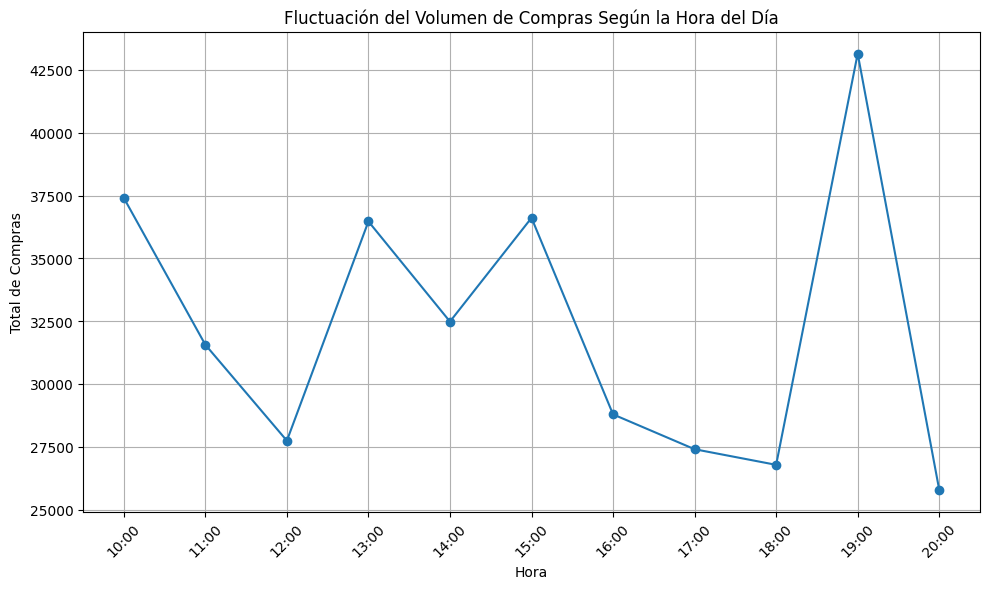

In [25]:
import matplotlib.dates as mdates

df['Time_rounded'] = pd.to_datetime(df['Time'], format='%H:%M').dt.floor('H')

hourly_purchases = df.groupby('Time_rounded')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_purchases['Time_rounded'], hourly_purchases['Total'], marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))

plt.title('Fluctuación del Volumen de Compras Según la Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Total de Compras')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [27]:
# El motivo por el que no aparece las 21hs es porque el dataset sólo contempla las compras efectuadas hasta las 20:59hs, demostrado por el siguiente método
df['Time_converted'] = pd.to_datetime(df['Time'], format='%H:%M')

compras_despues_20 = df[df['Time_converted'].dt.time >= pd.to_datetime('20:00').time()].head(5)

print(compras_despues_20)

     Invoice ID Branch       City Customer type  Gender  \
3   123-19-1176      A     Yangon        Member    Male   
43  228-96-1411      C  Naypyitaw        Member  Female   
59  120-06-4233      C  Naypyitaw        Normal    Male   
87  633-44-8566      A     Yangon        Member    Male   
94  512-91-0811      C  Naypyitaw        Normal    Male   

              Product line  Unit price  Quantity  Tax 5%    Total       Date  \
3        Health and beauty       58.22         8  23.288  489.048  1/27/2019   
43      Food and beverages       98.70         8  39.480  829.080   3/4/2019   
59  Electronic accessories       30.61         6   9.183  192.843  3/12/2019   
87      Food and beverages       49.38         7  17.283  362.943  3/27/2019   
94       Health and beauty       89.75         1  44.875  942.375   2/6/2019   

     Time      Payment    cogs  gross income  Rating        Time_rounded  \
3   20:33      Ewallet  465.76        23.288     8.4 1900-01-01 20:00:00   
43  20:39   

Me gustaría ver cómo el porcentaje total de compras se divide según el género, y para eso considero que la mejor visualización sería un gráfico de torta.

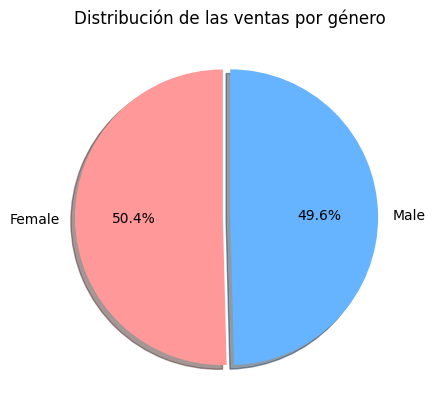

In [28]:
df.groupby('Gender')['Total'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], explode=(0.05, 0), shadow=True)
plt.title('Distribución de las ventas por género')
plt.ylabel('')
plt.show()


Con el fin de generar promociones con algún método de pago, sería intersante ver cuál es el más usado.

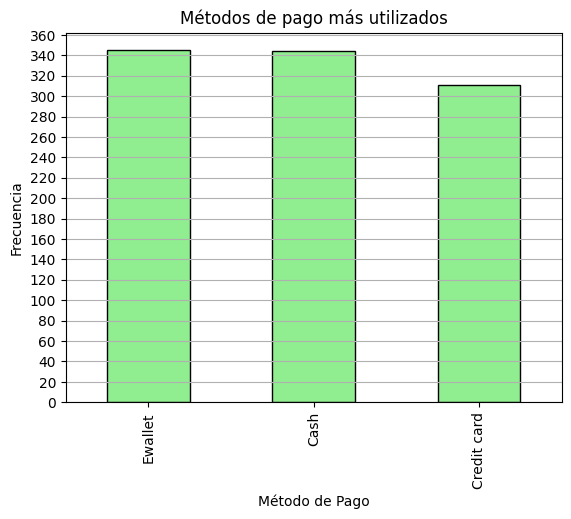

In [29]:
payment_counts = df['Payment'].value_counts()
ax = payment_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

y_ticks = np.arange(0, payment_counts.max() + 20, 20)
ax.set_yticks(y_ticks)

plt.title('Métodos de pago más utilizados')
plt.ylabel('Frecuencia')
plt.xlabel('Método de Pago')
plt.grid(axis='y')
plt.show()


Me gustaría saber qué línea de productos le genera más ingresos a la cadena de supermercados, así que usaré un gráfico de barras para medirlo.

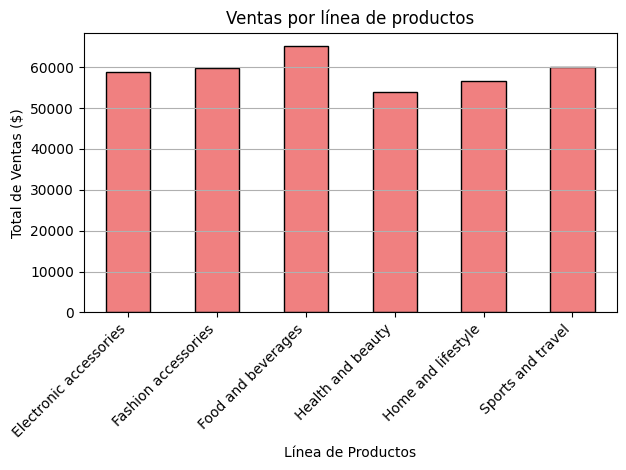

In [30]:
df.groupby('Product line')['Total'].sum().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Ventas por línea de productos')
plt.ylabel('Total de Ventas ($)')
plt.xlabel('Línea de Productos')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Quiero comprobar si el sistema de puntuación tiene relación con el gasto del cliente, o si no es un sistema que sea importante tomar en cuenta.

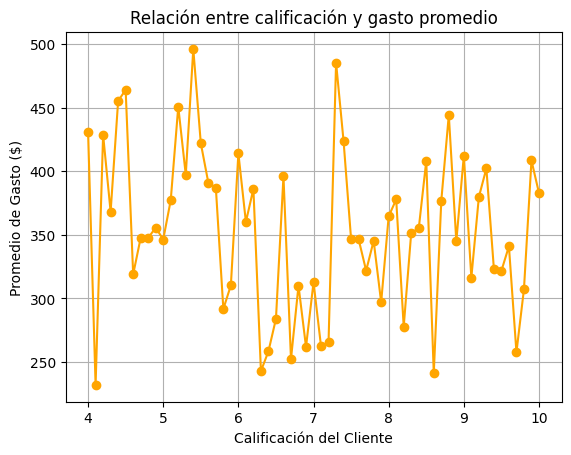

In [31]:
df.groupby('Rating')['Total'].mean().plot(kind='line', marker='o', color='orange')
plt.title('Relación entre calificación y gasto promedio')
plt.ylabel('Promedio de Gasto ($)')
plt.xlabel('Calificación del Cliente')
plt.grid(True)
plt.show()


Considero relevante saber qué sucursal genera más ingresos, con el fin de expandirla o alocar más mercancía allí.

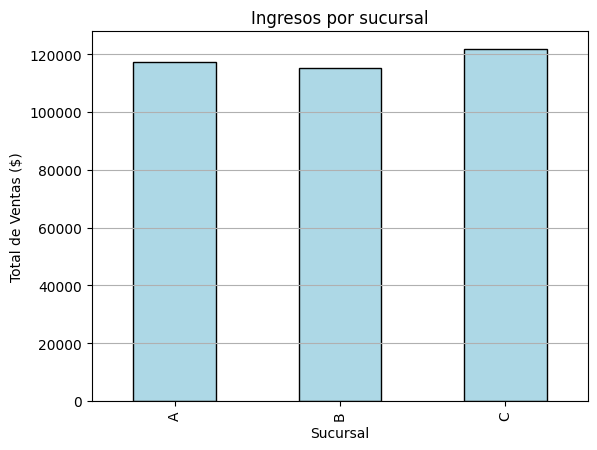

In [32]:
df.groupby('Branch')['Total'].sum().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Ingresos por sucursal')
plt.ylabel('Total de Ventas ($)')
plt.xlabel('Sucursal')
plt.grid(axis='y')
plt.show()


Ahora bien, en post de ayudar a la cadena de supermercados a segmentar a los clientes en grupos específicos basados en sus patrones de compra y satisfacción, utilizaré un modelo K-means para crear clusters de clientes, según la unidad de producto que compran, la cantidad, y su satisfacción al hacerlo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


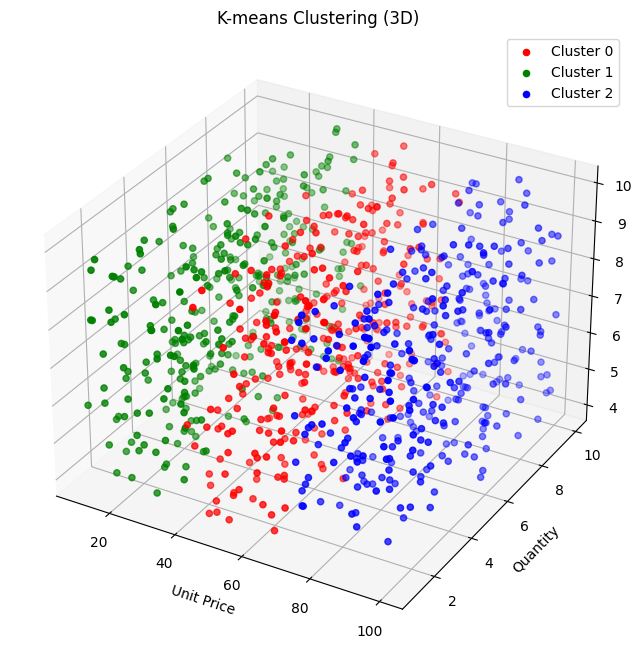

In [6]:
X = df[['Unit price', 'Quantity', 'Rating']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for cluster in range(3):
    ax.scatter(X[df['Cluster'] == cluster]['Unit price'],
               X[df['Cluster'] == cluster]['Quantity'],
               X[df['Cluster'] == cluster]['Rating'],
               c=colors[cluster], label=f'Cluster {cluster}')

ax.set_xlabel('Unit Price')
ax.set_ylabel('Quantity')
ax.set_zlabel('Rating')
plt.title('K-means Clustering (3D)')
plt.legend()
plt.show()

Finalmente, me gustaría trabajar sobre la que parece ser la variable más volátil del set, y tratar de predecir el rating de los clientes, teniendo en cuenta algunas de las variables que se me proporcionan. Para ello, haré lo siguiente:

1 - Reduciré la dimensionalidad del dataset a las features que me interesan para el análisis, en este caso, 2 componentes principales para poder graficar luego. Para lograr esto, utilizaré PCA, previamente codificando las variables categóricas con Label Encoder.

2 - Dado que lo que quiero que se prediga es un valor contínuo (el Rating), entrenaré un modelo de regresión. En este caso, utilizaré KNeighborsRegressor.

3 - Calcularé las métricas pertinentes para validar el modelo, las cuales serán el coeficiente de determinación y el error cuadrático medio.


Error cuadrático medio (MSE): 3.66
Coeficiente de determinación (R2): -0.23


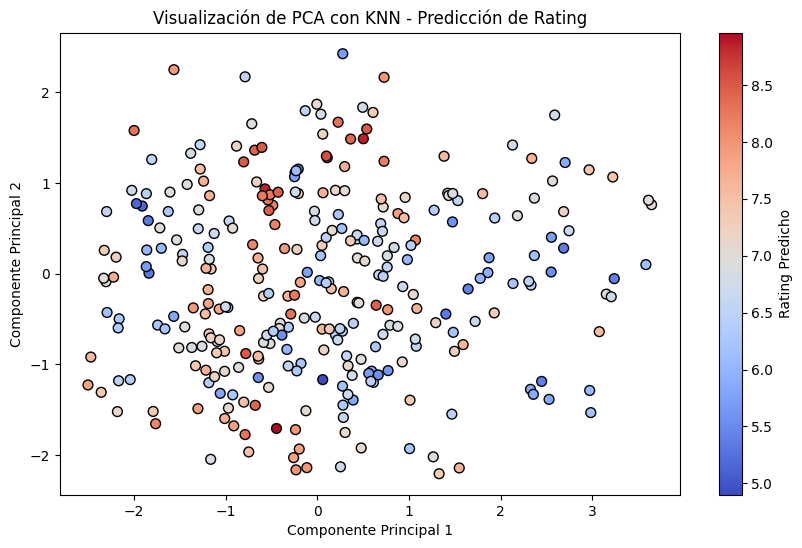

In [8]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Payment'] = label_encoder.fit_transform(df['Payment'])
df['Product line'] = label_encoder.fit_transform(df['Product line'])

X = df[['Unit price', 'Quantity', 'Total', 'Gender', 'Payment', 'Product line']]
y = df['Rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R2): {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Visualización de PCA con KNN - Predicción de Rating')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Rating Predicho')
plt.show()



Dado que el modelo anterior presenta métricas poco deseables, intentaré utilizar regresión lineal para mejorarlas. Además, intentaré variar números de componentes en PCA para ver si mejora las métricas. Para escoger el mejor número de componentes, los elegiré de un rango de entre 2 a 5, y una vez hayan sido calculados, mostraré únicamente el mejor:


Número de Componentes: 2
Error cuadrático medio (MSE): 2.98
Coeficiente de determinación (R2): -0.00

Número de Componentes: 3
Error cuadrático medio (MSE): 2.98
Coeficiente de determinación (R2): -0.00

Número de Componentes: 4
Error cuadrático medio (MSE): 3.00
Coeficiente de determinación (R2): -0.01

Número de Componentes: 5
Error cuadrático medio (MSE): 3.00
Coeficiente de determinación (R2): -0.01

Mejor Error cuadrático medio (MSE): 2.98
Mejor Coeficiente de determinación (R2): -0.00


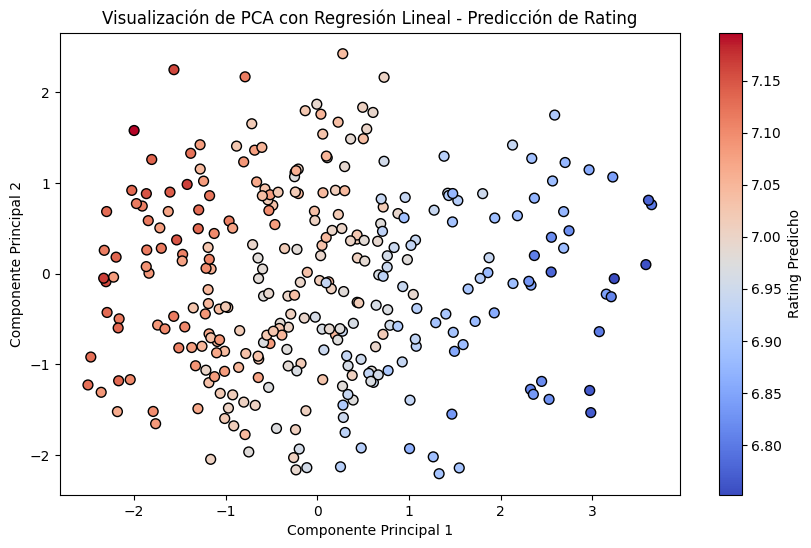

In [9]:
X = df[['Unit price', 'Quantity', 'Total', 'Gender', 'Payment', 'Product line']]
y = df['Rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

components_range = [2, 3, 4, 5]
best_r2 = -np.inf
best_pca = None
best_model = None
best_X_test = None
best_y_test = None

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    y_pred = lin_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Número de Componentes: {n_components}')
    print(f'Error cuadrático medio (MSE): {mse:.2f}')
    print(f'Coeficiente de determinación (R2): {r2:.2f}\n')

    if r2 > best_r2:
        best_r2 = r2
        best_pca = pca
        best_model = lin_reg
        best_X_test = X_test
        best_y_test = y_test

if best_model:
    y_pred_best = best_model.predict(best_X_test)
    print(f'Mejor Error cuadrático medio (MSE): {mean_squared_error(best_y_test, y_pred_best):.2f}')
    print(f'Mejor Coeficiente de determinación (R2): {best_r2:.2f}')

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(best_X_test[:, 0], best_X_test[:, 1], c=y_pred_best, cmap='coolwarm', edgecolor='k', s=50)
    plt.title('Visualización de PCA con Regresión Lineal - Predicción de Rating')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.colorbar(scatter, label='Rating Predicho')
    plt.show()

Incluso en el mejor de los casos, el modelo sigue sin poder predecir correctamente los ratings. Para corroborar si los ratings efectivamente no son predecibles a través de las variables presentes en el dataset, intentaré utilizando árboles de decisión y random forest:

Error cuadrático medio (MSE): 6.40
Coeficiente de determinación (R2): -1.15


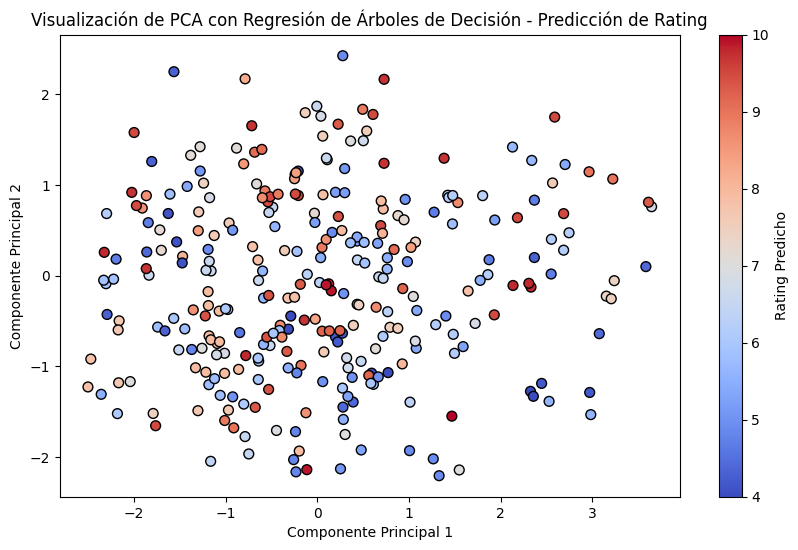

In [10]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Unit price', 'Quantity', 'Total', 'Gender', 'Payment', 'Product line']]
y = df['Rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R2): {r2:.2f}')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Visualización de PCA con Regresión de Árboles de Decisión - Predicción de Rating')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Rating Predicho')
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Error cuadrático medio (MSE): 3.22
Coeficiente de determinación (R2): -0.08


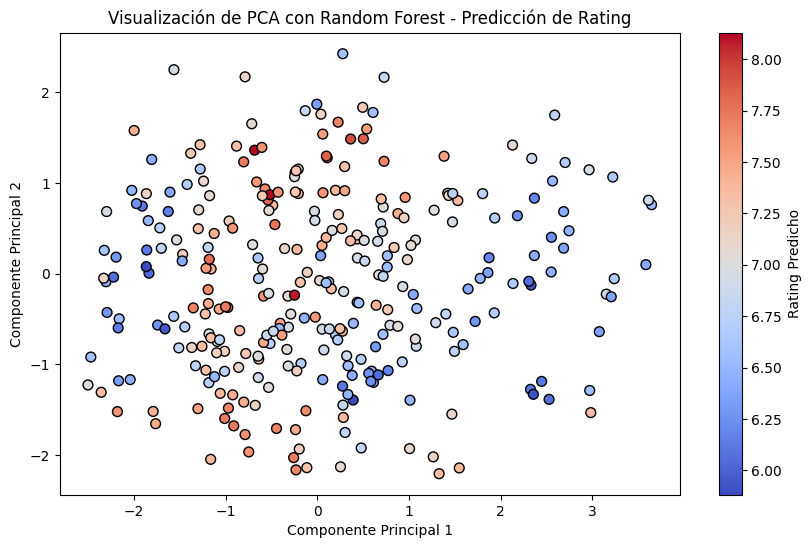

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X = df[['Unit price', 'Quantity', 'Total', 'Gender', 'Payment', 'Product line']]
y = df['Rating']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_regressor = grid_search.best_estimator_

y_pred = best_rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R2): {r2:.2f}')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Visualización de PCA con Random Forest - Predicción de Rating')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Rating Predicho')
plt.show()


Hipótesis:


1 - El sistema de membresía parece ser uno que da resultado: podemos ver claramente que los clientes miembros son los que más compran, según el primer gráfico, y los que más gastan también, según el segundo.

2 - La apertura de los supermercados y las 19:00hs son los momentos en los que más ventas se registran, con lo cual, antes de la apertura, y de 16:00 a 18:00hs podrían resultar las horas más efectivas para llevar a cabo restocks. Por otro lado, las 12:00hs parecería la mejor hora para coordinar breaks.

3 - La diferencia de distribución de ventas por género es prácitcamente despreciable, por lo que no sería una buena idea generar publicidad apuntada a un género en específico o a las compras que realiza. Por esto último no consideré necesario medir qué líneas de producto consume más cada género.

4 - Los métodos de pago tipo cash o e-wallet parecen ser los más frecuentes. Esto podría indicar que la gente no planea compras utilizando tarjeta de crédito dado que las compras en supermercado suelen no ser gastos que necesiten ser pagados en cuotas y se suelen consumir a lo largo del mes. Por este motivo, quizás sería intersante entrar en conversaciones con alguna e-wallet y conseguir algún tipo de convenio o beneficio mutuo para aprovechar el uso tan frecuente de este medio de pago en supers.

5 - Por un margen bastante grande, Food and beverages es la línea de productos que más ingresos genera. Este es un resultado lógico, dado que por lo general, las compras del super suelen abarcar la comida y bebida del mes. Sin embargo Health and beauty y Home and lifestyle parecen estar bastante por debajo de el resto de líneas. Esto puede deberse a que para compras de este tipo de productros, la mayoría de gente probablemente acudiría a farmacias o decos. Para palear esto, estas dos líneas de productos podrían ser suceptibles de descuentos o promociones.

6 -  En cuanto al sistema de puntuaciones, si bien los resultados parecen un poco aleatorios, podemos ver que los puntajes más altos están reservados para gastos de entre aproximadamente $300 y $450, con los puntajes más bajos ubicandose entre aproximadamente $350 y $500, y los medianos en general en compras de bajo costo. La hipótesis en este caso sería que es más difícil complacer a los clientes mientras mayor sea el gasto, y que esto podría tratar de arreglarse con promociones para gastos mayores a $400 o medidas similares.

7 - La sucursal C es la que más ingresos registra, por lo que se podría considerar una posible expansión en cuanto a tamaño o en cuanto a volumen de stock para la misma.

8 - Acerca del exhaustivo análisis del rating utilizando diversos modelos de aprendizaje supervisado, llegué a la no muy satisfactoria conclusión de que, al menos con los datos actuales del dataset, es muy complicado predecir el rating que los clientes darán al concretar su compra. Finalmente, el modelo de regresión lineal con 2 componentes fue el que mejores métricas presentó, pero aún así, su R2 indica que el modelo no está capturando bien la variabilidad de los datos y un MSE de 2.98 muestra que la desviación del valor real del rating es significativa. No obstante, se puede sacar en limpio que quizás la variable Rating, al ser tan volátil y difícil de predecir, puede ser dejada de lado a la hora de tomar decisiones, ya que su relación con las demás variables parece ser muy baja. El ahorro de recursos gastados en esta variable puede impactar positivamente, al redirigirlos a las demás, que probaron ser más beneficiosas al análisis.